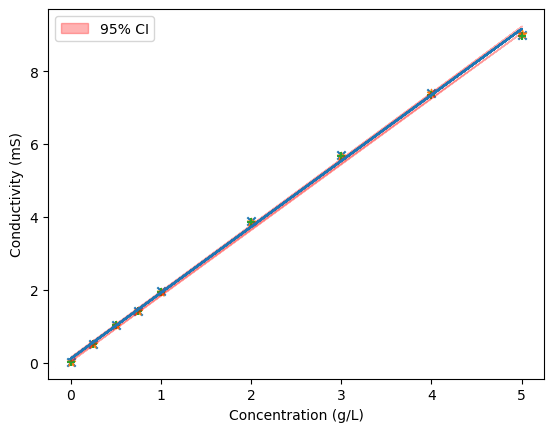

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import plotly.graph_objects as go
import matplotlib.pyplot as plt

def plot_calibration(fileName):
    # Load data from Excel
    df = pd.read_excel(fileName, sheet_name="Results")
    
    x_from_excel = df["Concentration_(g/L)"]
    y1 = df["Conductivity_A_(mS)"]
    y2 = df["Conductivity_B_(mS)"]
    y3 = df["Conductivity_C_(mS)"]
    
    # Concat y arrays to get all y data, and replicate x_data 3 times so all 
    # y values have the correct corresponding value in x_data
    y_data = np.concatenate([y1,y2,y3])
    # print(x_from_excel)
    x_data = np.tile(x_from_excel,3)
    
    # print(x_data)
    # print(y_data)
    
    # Add a constant term for the intercept so statsmodel
    # can try and find an intercept
    X = sm.add_constant(x_data)
    # print(x_data)
    # print(X)
    
    # Fit the OLS model to the data 
    model = sm.OLS(y_data, X).fit()
    # print(model.summary())
    
    # Confidence intervals for the model parameters
    conf_intervals = model.conf_int()
    # print(conf_intervals)
    
    # Get prediction results
    pred = model.get_prediction(X)
    pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals
    # print(pred)
    # Extract confidence intervals
    ci_lower = pred_summary['mean_ci_lower']
    ci_upper = pred_summary['mean_ci_upper']
    # print(ci_lower)
    # print(ci_upper)
    
    plt.figure()
    plt.scatter(x_from_excel, y1, marker="x")
    plt.scatter(x_from_excel, y2,marker="*")
    plt.scatter(x_from_excel, y3,marker="+")
    # plt.fill_between(x_from_excel, ci_lower, ci_upper, color='red', alpha=0.3, label='95% CI')
    
    plt.plot(x_data, model.fittedvalues)
    # print(x_from_excel)
    plt.fill_between(x_data, ci_lower, ci_upper, color="red", alpha=0.3, label="95% CI")

    plt.xlabel("Concentration (g/L)")
    plt.ylabel("Conductivity (mS)")
    plt.legend()
    # plt.show()
    
    fig = go.Figure()
    
    # Plot the three runs 
    # fig.add_trace(go.Scatter(x=x_from_excel, y=y1, mode='markers', marker=dict(symbol='x'), name='y1'))
    fig.add_trace(go.Scatter(x=x_from_excel,y=y1, mode="markers", marker=dict(symbol="x", color="red"), name="Run 1"))
    fig.add_trace(go.Scatter(x=x_from_excel,y=y2, mode="markers", marker=dict(symbol="star",color="blue"), name="Run 2"))
    fig.add_trace(go.Scatter(x=x_from_excel,y=y3, mode="markers", marker=dict(symbol="cross",color="green"), name="Run 3"))
    
    # Plot the OLS regression and add error bars
    
    upper_error = ci_upper - model.fittedvalues  # Distance from fit line to upper bound
    lower_error = model.fittedvalues - ci_lower  # Distance from fit line to lower bound

    fig.add_trace(go.Scatter(
        x=x_data, 
        y=model.fittedvalues, 
        mode='lines', 
        name='Fitted Model',
        line=dict(color="black"),
        error_y=dict(
            type='data',
            symmetric=False,  # Allow different upper and lower errors
            array=upper_error,  # Upper error bound
            arrayminus=lower_error,  # Lower error bound
            visible=True,
            color="black"
        )
    ))
    

    # Plot the confidence intervals 
    # fig.add_trace(go.Scatter(x=x_data, y=ci_upper, fill=None, mode='lines', line=dict(color='red'), showlegend=False))
    # fig.add_trace(go.Scatter(x=x_data, y=ci_lower, fill='tonexty', mode='lines', line=dict(color='red'), fillcolor='rgba(255, 0, 0, 0.3)', name='95% CI'))

    
    fig.show()
    
    
    

   

plot_calibration("RO_Week_1_Data.xlsx")
# plot_calibration("RO_Week_2_Data.xlsx")



In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import plotly.graph_objects as go

def plot_calibration(fileName):
    # Load data from Excel
    df = pd.read_excel(fileName, sheet_name="Results")
    
    x_from_excel = df["Concentration_(g/L)"]
    y1 = df["Conductivity_A_(mS)"]
    y2 = df["Conductivity_B_(mS)"]
    y3 = df["Conductivity_C_(mS)"]
    
    # Concat y arrays to get all y data, and replicate x_data 3 times so all 
    # y values have the correct corresponding value in x_data
    y_data = np.concatenate([y1,y2,y3])
    # print(x_from_excel)
    x_data = np.tile(x_from_excel,3)
    
    # print(x_data)
    # print(y_data)
    
    # Add a constant term for the intercept
    X = sm.add_constant(x_data)
    print(x_data)
    print(X)
    
    # Fit the OLS model to the data 
    model = sm.OLS(y_data, X).fit()
    # print(model.summary())
    
    # Confidence intervals for the model parameters
    conf_intervals = model.conf_int()
    # print(conf_intervals)
    
    # Get prediction results
    pred = model.get_prediction(X)
    pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals
    
    # Extract confidence intervals
    ci_lower = pred_summary['mean_ci_lower']
    ci_upper = pred_summary['mean_ci_upper']
    # print(ci_lower)
    # print(ci_upper)

    # # Combine all y values into one dataset for regression
    # all_y = np.concatenate([y1, y2, y3])
    # # Repeat x-values to match y-values
    # all_x = np.tile(x_original, 3)  

    # # Prepare data for statsmodels regression
    # x = sm.add_constant(all_x)  # Add intercept term
    # y = pd.concat([y1, y2, y3]).reset_index(drop=True)  # Flatten y values

    # # Fit Ordinary Least Squares (OLS) model
    # model = sm.OLS(y, x).fit()

    # # Extract regression parameters
    # slope = model.params.iloc[1]  # Slope
    # intercept = model.params.iloc[0]  # Intercept
    # equation_text = f"y = {slope:.4f}x + {intercept:.4f}"  # Equation text for display

    # # Compute and print 95% confidence intervals
    # conf_int = model.conf_int(alpha=0.05)
    # print("95% Confidence Intervals for Regression Coefficients:")
    # print(f"Intercept: {conf_int.iloc[0, 0]:.5f} to {conf_int.iloc[0, 1]:.5f}")
    # print(f"Slope: {conf_int.iloc[1, 0]:.5f} to {conf_int.iloc[1, 1]:.5f}")

    # # Compute linear regression using SciPy
    # scipy_slope, scipy_intercept, _, _, _ = stats.linregress(all_x, all_y)

    # # Generate x values for plotting regression lines
    # x_linespace = np.linspace(x_original.min(), x_original.max(), 10000)
    
    # # Calculate predicted values to get error bars 
    # y_pred = model.predict(sm.add_constant(x_original))
    
    
    # delete this 
    # # # Create Plotly figure
    # # fig = go.Figure()

    # # # Scatter plots for individual trials
    # # fig.add_trace(go.Scatter(x=x_original, y=y1, mode='markers', marker=dict(color='black', symbol='x', size=6),
    # #                          name="Trial A"))
    # # fig.add_trace(go.Scatter(x=x_original, y=y2, mode='markers', marker=dict(color='red', symbol='circle', size=6),
    # #                          name="Trial B"))
    # # fig.add_trace(go.Scatter(x=x_original, y=y3, mode='markers', marker=dict(color='blue', size=6),
    # #                          name="Trial C"))

    # # # Plot regression lines
    # # fig.add_trace(go.Scatter(x=x_linespace, y=slope * x_linespace + intercept, mode='lines', line=dict(color='blue'),
    # #                          name="Statsmodels Fit"))
    # # # fig.add_trace(go.Scatter(x=x_linespace, y=scipy_slope * x_linespace + scipy_intercept, mode='lines', 
    # # #                          line=dict(color='red', dash='dash'), name="SciPy Fit"))

    # # # Add equation annotation
    # # fig.add_annotation(
    # #     x=x_original.max(),
    # #     y=slope * x_original.max() + intercept,
    # #     text=f"<b>{equation_text}</b>",
    # #     # showarrow=False,
    # #     font=dict(size=14, color="black"),
    # #     align="right",
    # #     xanchor="right",
    # #     yanchor="bottom",
    # #     bgcolor="white"
    # # )

    # # # Layout customization
    # # fig.update_layout(
    # #     title=f"Calibration Curve - {fileName}",
    # #     xaxis_title="Concentration (g/L)",
    # #     yaxis_title="Conductivity (mS)",
    # #     legend=dict(x=0, y=1),
    # #     template="plotly_white",
    # #     autosize=False,
    # #     width=600,
    # #     height=600
    # # )

    # # # Show interactive plot
    # # fig.show()

plot_calibration("RO_Week_1_Data.xlsx")
# plot_calibration("RO_Week_2_Data.xlsx")



[[1.   0.25]
 [1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]
 [1.   2.  ]
 [1.   3.  ]
 [1.   4.  ]
 [1.   5.  ]
 [1.   0.  ]
 [1.   0.25]
 [1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]
 [1.   2.  ]
 [1.   3.  ]
 [1.   4.  ]
 [1.   5.  ]
 [1.   0.  ]
 [1.   0.25]
 [1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]
 [1.   2.  ]
 [1.   3.  ]
 [1.   4.  ]
 [1.   5.  ]
 [1.   0.  ]]
